In [63]:
import regex as re
import pandas as pd
from datetime import datetime
from sklearn.utils import shuffle
import datefinder
import spacy
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle


data1=data2=data3=data4=data5=data6=""

with open(r"C:\Users\boppu\Downloads\may_log1.log" , "r") as fp:
    data1 = fp.read()
    
with open(r"C:\Users\boppu\Downloads\may_log2.log" , "r") as fp:
    data2 = fp.read()
    
with open(r"C:\Users\boppu\Downloads\may_log3.log" , "r") as fp:
    data3 = fp.read()
    
with open(r"C:\Users\boppu\Downloads\may_log4.log" , "r") as fp:
    data4 = fp.read()
    
with open(r"C:\Users\boppu\Downloads\may_log5.log" , "r") as fp:
    data5 = fp.read()
    
with open(r"C:\Users\boppu\Downloads\may_log6.log" , "r") as fp:
    data6 = fp.read()
    

data1 += "\n"
data1 += data2
data1 += data3
data1 += data4
data1 += data5
data1 += data6

file_path = r"C:\Users\boppu\Downloads\logs_combined.log"

with open(file_path , "w") as fp:
    fp.write(data1)
    
log_file = r"C:\Users\boppu\Downloads\logs_combined.log"

with open(log_file , "r") as f:
    log_text = f.read()
    

pattern1 = "-------text input -----:\s*(.*)"
logs_texts = re.findall(pattern1, log_text)

logs_texts = '\n'.join(logs_texts)


Message = re.sub('<[^<]+?>', '', logs_texts)

Message = re.sub(r'([^A-Za-z0-9\n])\1{2,}', r'\1', Message)

Message = re.sub(r'[\t\f\v ]+', ' ', Message)

lines = Message.split('\n')

data = {'Message': lines}

df1 = pd.DataFrame(data)
df1["Message"] = df1["Message"].str.lstrip('-')
df1["Message"] = df1["Message"].str.lstrip('=')

pattern2 = r"Class Name Predicted with ML:\s*(.*)|class_name Predicted with Static Pattern:\s*(.*)"
log_results = re.findall(pattern2, log_text)
logs_texts = '\n'.join([x[0] if x[0] else x[1] for x in log_results if x[0] or x[1]])

lines = logs_texts.split('\n')

data = {'Class': lines}

df2 = pd.DataFrame(data)

df2 = df2[df2["Class"] != "'None'"]
df2 = df2.reset_index(drop=True)

df2["Class"] = df2["Class"].str.strip("''")

data_logs_all = pd.concat([df1, df2], axis=1) 

In [64]:
data_tcl = pd.read_csv(r"C:\Users\boppu\Downloads\data_logs_all.csv")
data_tcl = data_tcl.drop("Unnamed: 0", axis=1)
desired_data = data_tcl

In [65]:
desired_data_ETR = desired_data[desired_data["Class"] == "ETR"]

In [66]:
desired_data_ETR

,Message,Class
33,Dear Customer We have worked with our wireless...,ETR
41,RFO: CONNECTING SITE (GUW063ACE TOWER) WAS DOW...,ETR
44,"priority-Down Call - Major, dueDate-26-05-2023...",ETR
138,"From: TTLSOC CARRIERNORTH Sent: Saturday, May ...",ETR
158,"Dear Team, ETR 11:30 PM from now, Delay due to...",ETR
...,...,...
4303,ETR-2H by vijendra@ripl.info,ETR
4326,"priority-Down Call - Major, dueDate-08-05-2023...",ETR
4363,"Dear Team, We are checking the reported issue ...",ETR
4374,"priority-Down Call - Major, dueDate-08-05-2023...",ETR


In [68]:
import pandas as pd
import re

# Assuming your DataFrame is named "desired_data" with columns "Message" and "Class"

# Convert the DataFrame column to string
desired_data['Message'] = desired_data['Message'].astype(str)

# Function to extract time and date after ETR until next text
def extract_etr_time_date(message):
    pattern = r'ETR\D*(\d{1,2}(?:\.\d{2})?(?:\s*(?:hr|hour|hours|hrs|Hours|HR|Hr|H|HOUR|HOURS|Hrs|MIN|Min|AM|PM))?(?:\s*\d{1,2}(?:\/\d{2})?(?:\/\d{4})?)?(?:\s*\d{1,2}(?::\d{2})?(?:\s*(?:AM|PM))?)?)'
    match = re.search(pattern, message, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return ""

# Apply the regex on the string representation of the column
desired_data['ETR time'] = desired_data['Message'].apply(extract_etr_time_date)

# Print the updated DataFrame
desired_data = desired_data[['Message', 'Class', 'ETR time']]
desired_data

,Message,Class,ETR time
0,"Dear Customer, our last mile FE RAVI KIRAN (99...",Update,
1,RFO Segment RP World RFO Our FE visited CE sid...,RFO,
2,"Dear team, We will align our FE at ce side to...",Update,
3,RFO ;- Both end connector change,RFO,
4,"Dear Team,",Service Restored,
...,...,...,...
4460,NO ISSUE FOUND IN TX MEDIA,Update,
4461,Task Number: 102854660 has been Closed with Co...,Update,
4462,Service TT#: CSTASK0614742 Reason For Outage: ...,RFO,
4463,TATA COMMUNICATIONS LTD || SR - 613620283 || C...,Update,


In [69]:
desired_data[desired_data["Class"] == "ETR"].head(50)

,Message,Class,ETR time
33,Dear Customer We have worked with our wireless...,ETR,10
41,RFO: CONNECTING SITE (GUW063ACE TOWER) WAS DOW...,ETR,
44,"priority-Down Call - Major, dueDate-26-05-2023...",ETR,1 hr
138,"From: TTLSOC CARRIERNORTH Sent: Saturday, May ...",ETR,4 hr
158,"Dear Team, ETR 11:30 PM from now, Delay due to...",ETR,11
183,Action Code: 103-Due to Customer and ETR:,ETR,
228,"Dear Customer, We are checking with core team,...",ETR,3 Hour
233,From: TTLSOC CARRIERWEST Sent: 21 May 2023 17:...,ETR,4 hr
270,"priority-Down Call - Major, dueDate-23-05-2023...",ETR,2 hr
273,FE got access and working on issue for resolut...,ETR,2


# Linear SVC

In [63]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = desired_data["Message"]
y = desired_data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

             ETR       0.98      0.89      0.93        47
  FE aligned-ETA       0.91      0.83      0.87        35
             RFO       0.93      0.89      0.91       131
Service Restored       0.97      0.79      0.87        78
          Update       0.94      0.98      0.96       602

        accuracy                           0.94       893
       macro avg       0.94      0.88      0.91       893
    weighted avg       0.94      0.94      0.94       893



In [64]:
X_test = pd.DataFrame(X_test, columns=["Message"])

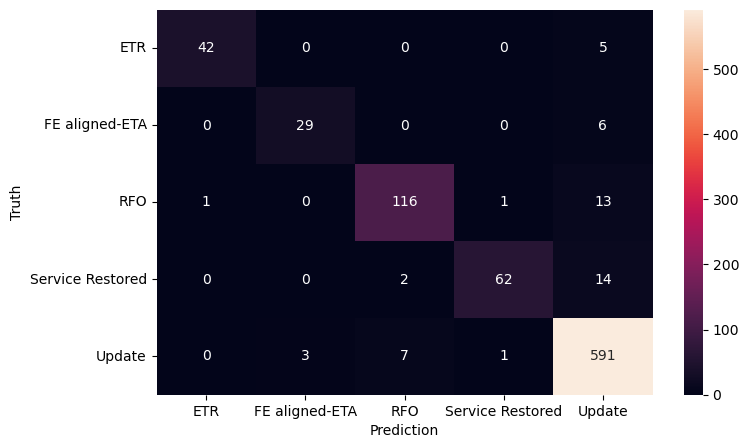

Misclassified Messages:
True Label: RFO, Predicted Label: Update
Message Text: Message      (0, 6161)\t0.4623469885524562\n  (0, 6158)\t...
Name: 1, dtype: object

True Label: Service Restored, Predicted Label: RFO
Message Text: Message      (0, 6162)\t0.10344158127154746\n  (0, 5909)\...
Name: 28, dtype: object

True Label: RFO, Predicted Label: Update
Message Text: Message      (0, 5673)\t0.7967864399954897\n  (0, 2880)\t...
Name: 39, dtype: object

True Label: Service Restored, Predicted Label: Update
Message Text: Message      (0, 6135)\t0.09171736065609574\n  (0, 5869)\...
Name: 46, dtype: object

True Label: ETR, Predicted Label: Update
Message Text: Message      (0, 6106)\t0.18626982536776102\n  (0, 6086)\...
Name: 89, dtype: object

True Label: Update, Predicted Label: RFO
Message Text: Message      (0, 6126)\t0.1263864198140471\n  (0, 6039)\t...
Name: 110, dtype: object

True Label: RFO, Predicted Label: Update
Message Text: Message      (0, 6161)\t0.13506963490763\n  (0, 6126

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# assume y_true and y_pred are the true and predicted labels, respectively
labels = ['ETR', 'FE aligned-ETA', 'RFO', 'Service Restored', 'Update']  # Replace with your class labels

cm = confusion_matrix(y_test.tolist(), y_pred.tolist(), labels=labels)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()

# Find the indices of misclassified samples
misclassified_indices = [i for i in range(len(y_test)) if y_test.tolist()[i] != y_pred.tolist()[i]]

# Print the misclassified messages along with their text
# Print the misclassified messages along with their text
print("Misclassified Messages:")
for index in misclassified_indices:
    true_label = y_test.tolist()[index]
    predicted_label = y_pred.tolist()[index]
    message = X_test.iloc[index]  # Assuming X_test is a pandas DataFrame with the original text messages
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    print(f"Message Text: {message}")
    print()

# SVM

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
#desired_data = pd.read_csv()  # Replace with the path to your data file

# Split the data into train and test sets
X = desired_data["Message"]
y = desired_data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', LinearSVC())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'tfidf__max_features': [1000, 5000, 10000],  # Adjust the number of features
    'svc__C': [0.1, 1.0, 10.0],  # Adjust the regularization parameter
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Best Parameters:  {'svc__C': 1.0, 'tfidf__max_features': 1000}
Best Score:  0.9434557599263481
                  precision    recall  f1-score   support

             ETR       1.00      0.85      0.92        47
  FE aligned-ETA       0.86      0.86      0.86        35
             RFO       0.93      0.90      0.91       131
Service Restored       0.95      0.78      0.86        78
          Update       0.94      0.98      0.96       602

        accuracy                           0.94       893
       macro avg       0.94      0.87      0.90       893
    weighted avg       0.94      0.94      0.94       893

